In [ ]:
import pandas as pd
df = pd.read_csv("../output/batch_results.csv")
df.shepe

In [7]:
# 导入与加载
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import ast

sns.set_theme(style="whitegrid")

df = pd.read_csv("../output/batch_results.csv")

# 基本清理与特征
if df["layout"].dtype != "category":
    df["layout"] = df["layout"].astype("category")

def parse_exit_combo(x):
    if pd.isna(x):
        return []
    s = str(x).strip()
    try:
        v = ast.literal_eval(s)
        if isinstance(v, (list, tuple, set)):
            return list(v)
    except Exception:
        pass
    if s.startswith("[") and s.endswith("]"):
        inner = s[1:-1]
        parts = [p.strip(" '\"") for p in inner.split(",") if p.strip()]
        return parts
    return [s]

df["exit_list"] = df["exit_combo"].apply(parse_exit_combo)
df["exit_count"] = df["exit_list"].apply(len)

print("shape:", df.shape)
display(df.head())
display(df.describe(include="all"))

shape: (19440, 10)


floors    layout  per_room_occ  responders  exit_combo_id exit_combo  \
0       1  BASELINE             1           1              0          L   
1       1  BASELINE             1           1              1          R   
2       1  BASELINE             1           2              0         LR   
3       1  BASELINE             1           2              1         RL   
4       1  BASELINE             1           3              0        LLR   

   makespan_s makespan_hms exit_list  exit_count  
0  423.609835     00:07:04       [L]           1  
1  423.609835     00:07:04       [R]           1  
2  330.224927     00:05:30      [LR]           1  
3  330.224927     00:05:30      [RL]           1  
4  330.224927     00:05:30     [LLR]           1

floors    layout  per_room_occ    responders  exit_combo_id  \
count   19440.000000     19440  19440.000000  19440.000000   19440.000000   
unique           NaN         3           NaN           NaN            NaN   
top              NaN  BASELINE           NaN           NaN            NaN   
freq             NaN      6480           NaN           NaN            NaN   
mean        9.500000       NaN      5.500000      5.944444       1.388889   
std         5.188261       NaN      2.872355      2.676555       1.112528   
min         1.000000       NaN      1.000000      1.000000       0.000000   
25%         5.000000       NaN      3.000000      4.000000       0.000000   
50%         9.500000       NaN      5.500000      6.000000       1.000000   
75%        14.000000       NaN      8.000000      8.000000       2.000000   
max        18.000000       NaN     10.000000     10.000000       3.000000   

       exit_combo    makespan_s makespan_hms exit_list  exit_count  
count       19440  19440.000000        19440     19440     19440.0  
unique         36           NaN         3361        36         NaN  
top             L           NaN     00:04:09       [L]         NaN  
freq          540           NaN           22       540         NaN  
mean          NaN  13337.603116          NaN       NaN         1.0  
std           NaN  11168.784497          NaN       NaN         0.0  
min           NaN    185.431717          NaN       NaN         1.0  
25%           NaN   3274.132453          NaN       NaN         1.0  
50%           NaN  10522.676181          NaN       NaN         1.0  
75%           NaN  21801.525957          NaN       NaN         1.0  
max           NaN  51905.179860          NaN       NaN         1.0

In [8]:
# 全局与组合摘要

# 1) 全局最优/最差
glo = df.agg(
    mean_ms=("makespan_s", "mean"),
    median_ms=("makespan_s", "median"),
    min_ms=("makespan_s", "min"),
    max_ms=("makespan_s", "max"),
)

# 兼容显示：glo 可能是 Series 或 DataFrame
try:
    display(glo.to_frame("value"))  # 如果 glo 是 Series
except Exception:
    try:
        display(glo)  # 如果 glo 已是 DataFrame
    except Exception:
        display(pd.DataFrame(glo).rename(columns={0: "value"}))

# 2) 主要维度聚合：按 floors, layout, per_room_occ, responders
grp = (
    df.groupby(["floors", "layout", "per_room_occ", "responders"], as_index=False)
      .agg(
          mean_ms=("makespan_s", "mean"),
          median_ms=("makespan_s", "median"),
          std_ms=("makespan_s", "std"),
          best_ms=("makespan_s", "min"),
          n=("makespan_s", "size"),
      )
      .sort_values(["best_ms", "mean_ms"])
 )
display(grp.head(20))

# 3) 扩展：将出口数作为一个可解释特征
grp_ec = (
    df.groupby(["floors", "layout", "per_room_occ", "responders", "exit_count"], as_index=False)
      .agg(best_ms=("makespan_s", "min"), mean_ms=("makespan_s", "mean"), n=("makespan_s", "size"))
      .sort_values(["best_ms", "mean_ms"])
 )
display(grp_ec.head(20))

makespan_s
mean_ms    13337.603116
median_ms  10522.676181
min_ms       185.431717
max_ms     51905.179860

/var/folders/hc/md1w_nys60720kj9w3xngm5c0000gn/T/ipykernel_3105/2116578171.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["floors", "layout", "per_room_occ", "responders"], as_index=False)


floors    layout  per_room_occ  responders     mean_ms   median_ms  \
7         1  BASELINE             1           8  185.431717  185.431717   
8         1  BASELINE             1           9  185.431717  185.431717   
9         1  BASELINE             1          10  185.431717  185.431717   
6         1  BASELINE             1           7  205.929088  205.929088   
17        1  BASELINE             2           8  193.431717  193.431717   
18        1  BASELINE             2           9  193.431717  193.431717   
19        1  BASELINE             2          10  193.431717  193.431717   
16        1  BASELINE             2           7  217.929088  217.929088   
27        1  BASELINE             3           8  201.431717  201.431717   
28        1  BASELINE             3           9  201.431717  201.431717   
29        1  BASELINE             3          10  201.431717  201.431717   
26        1  BASELINE             3           7  229.929088  229.929088   
109       1         L             1          10  202.200711  202.200711   
108       1         L             1           9  209.804030  209.804030   
37        1  BASELINE             4           8  209.431717  209.431717   
38        1  BASELINE             4           9  209.431717  209.431717   
39        1  BASELINE             4          10  209.431717  209.431717   
36        1  BASELINE             4           7  241.929088  241.929088   
107       1         L             1           8  217.407350  217.407350   
106       1         L             1           7  246.348626  246.348626   

        std_ms     best_ms  n  
7     0.000000  185.431717  4  
8     0.000000  185.431717  4  
9     0.000000  185.431717  4  
6    23.668326  185.431717  4  
17    0.000000  193.431717  4  
18    0.000000  193.431717  4  
19    0.000000  193.431717  4  
16   28.287128  193.431717  4  
27    0.000000  201.431717  4  
28    0.000000  201.431717  4  
29    0.000000  201.431717  4  
26   32.905930  201.431717  4  
109   0.000000  202.200711  4  
108   8.779558  202.200711  4  
37    0.000000  209.431717  4  
38    0.000000  209.431717  4  
39    0.000000  209.431717  4  
36   37.524732  209.431717  4  
107   0.000000  217.407350  4  
106  33.418507  217.407350  4

/var/folders/hc/md1w_nys60720kj9w3xngm5c0000gn/T/ipykernel_3105/2116578171.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["floors", "layout", "per_room_occ", "responders", "exit_count"], as_index=False)


floors    layout  per_room_occ  responders  exit_count     best_ms  \
7         1  BASELINE             1           8           1  185.431717   
8         1  BASELINE             1           9           1  185.431717   
9         1  BASELINE             1          10           1  185.431717   
6         1  BASELINE             1           7           1  185.431717   
17        1  BASELINE             2           8           1  193.431717   
18        1  BASELINE             2           9           1  193.431717   
19        1  BASELINE             2          10           1  193.431717   
16        1  BASELINE             2           7           1  193.431717   
27        1  BASELINE             3           8           1  201.431717   
28        1  BASELINE             3           9           1  201.431717   
29        1  BASELINE             3          10           1  201.431717   
26        1  BASELINE             3           7           1  201.431717   
109       1         L             1          10           1  202.200711   
108       1         L             1           9           1  202.200711   
37        1  BASELINE             4           8           1  209.431717   
38        1  BASELINE             4           9           1  209.431717   
39        1  BASELINE             4          10           1  209.431717   
36        1  BASELINE             4           7           1  209.431717   
107       1         L             1           8           1  217.407350   
106       1         L             1           7           1  217.407350   

        mean_ms  n  
7    185.431717  4  
8    185.431717  4  
9    185.431717  4  
6    205.929088  4  
17   193.431717  4  
18   193.431717  4  
19   193.431717  4  
16   217.929088  4  
27   201.431717  4  
28   201.431717  4  
29   201.431717  4  
26   229.929088  4  
109  202.200711  4  
108  209.804030  4  
37   209.431717  4  
38   209.431717  4  
39   209.431717  4  
36   241.929088  4  
107  217.407350  4  
106  246.348626  4

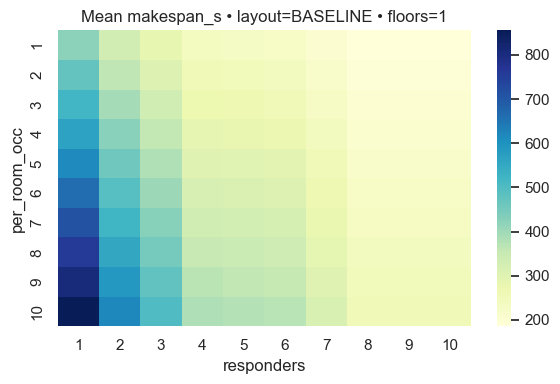

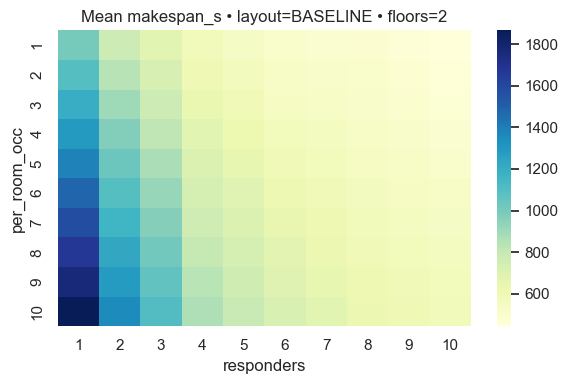

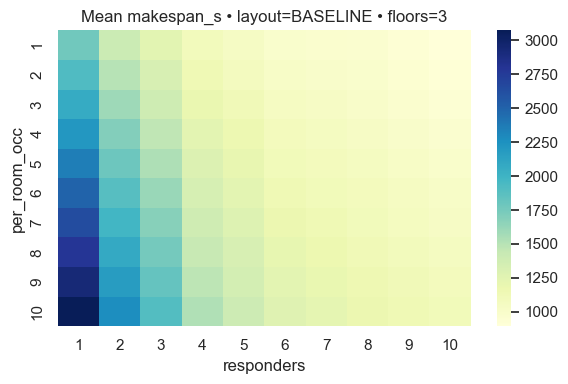

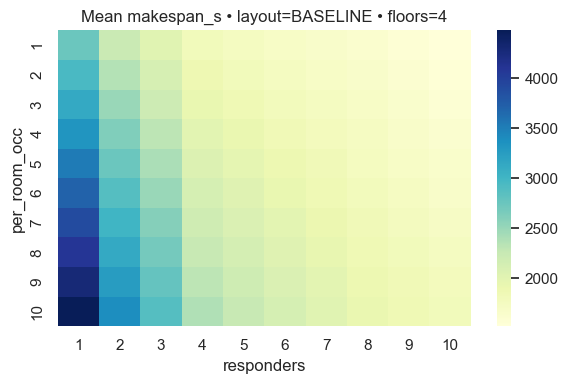

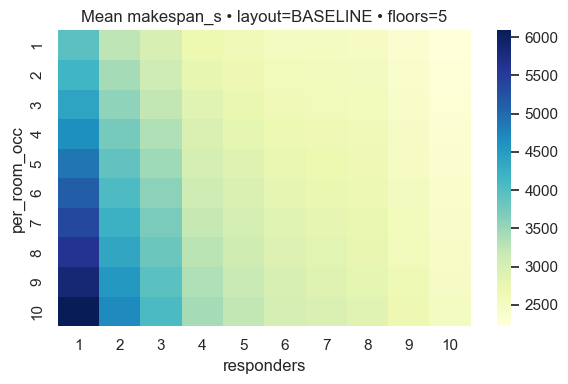

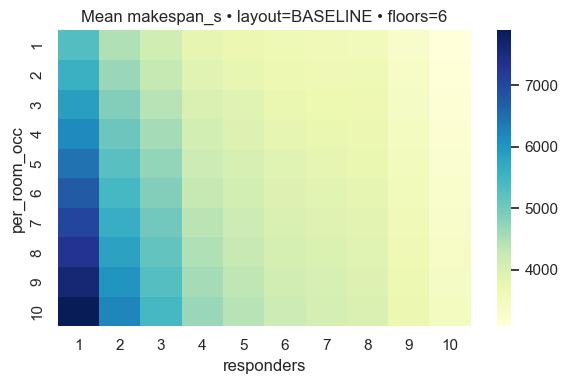

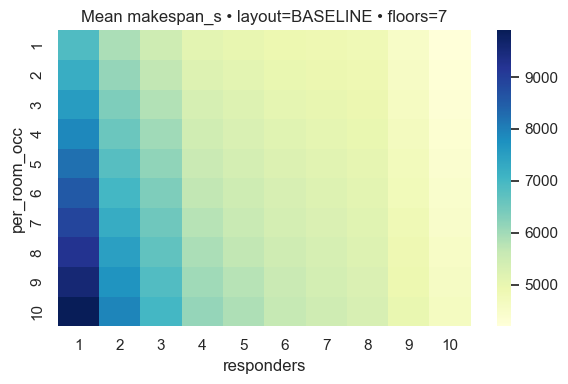

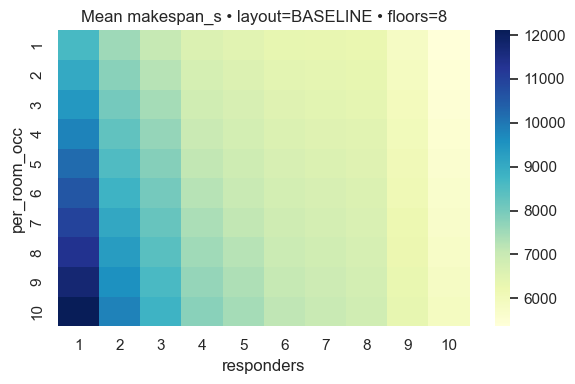

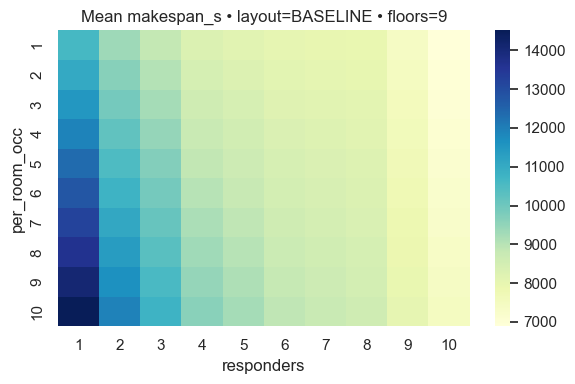

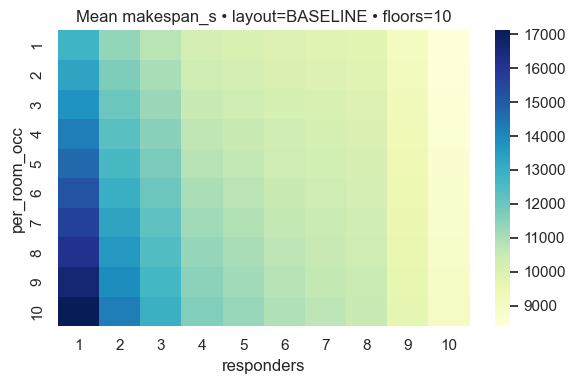

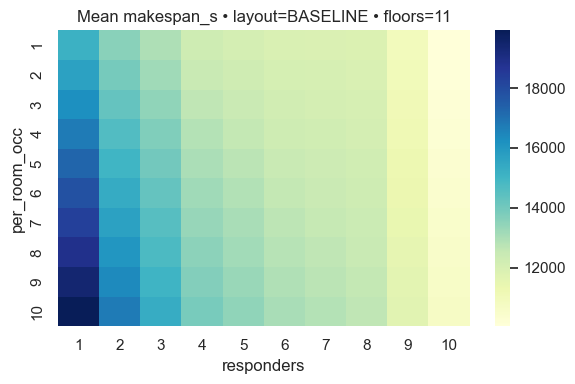

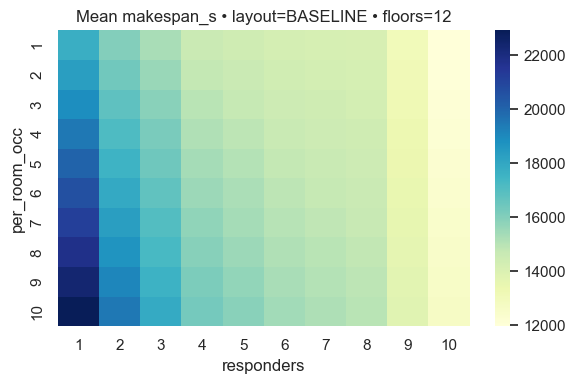

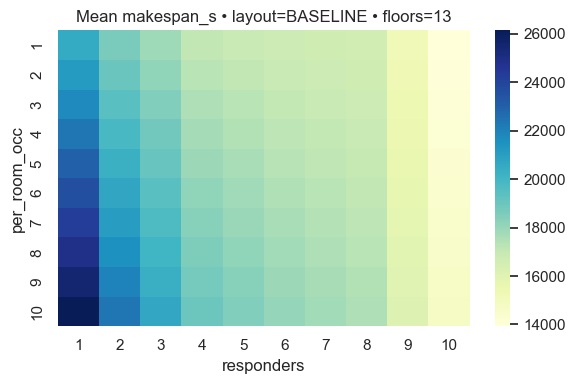

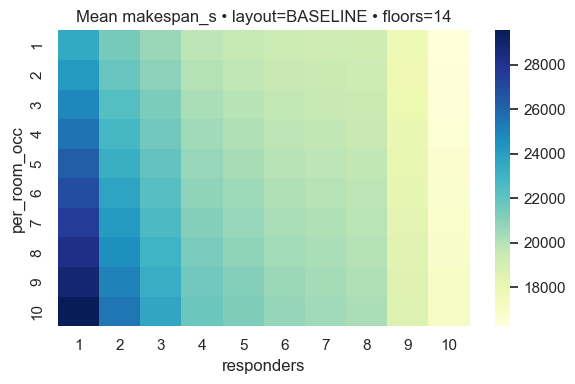

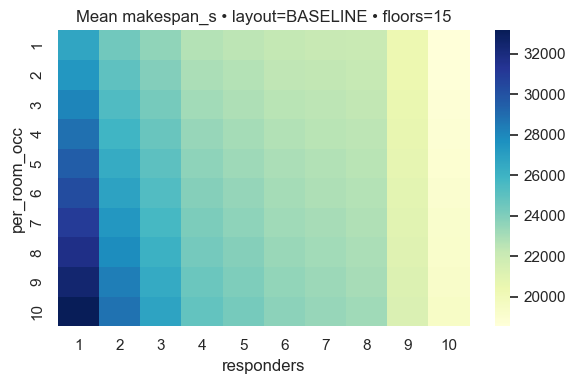

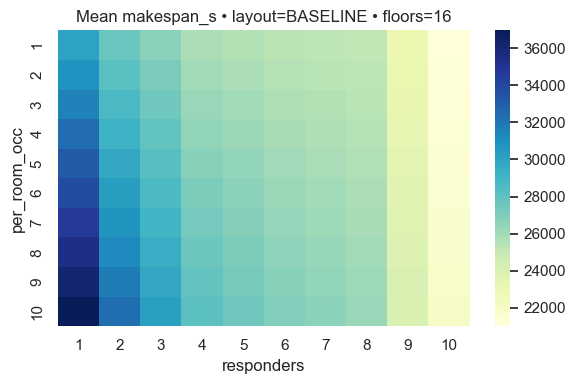

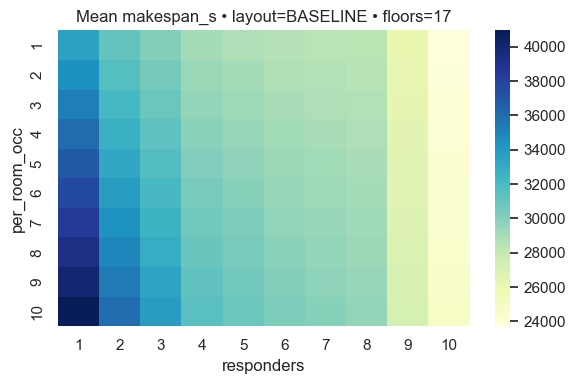

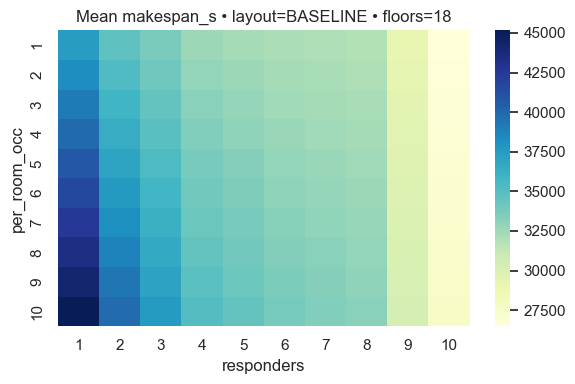

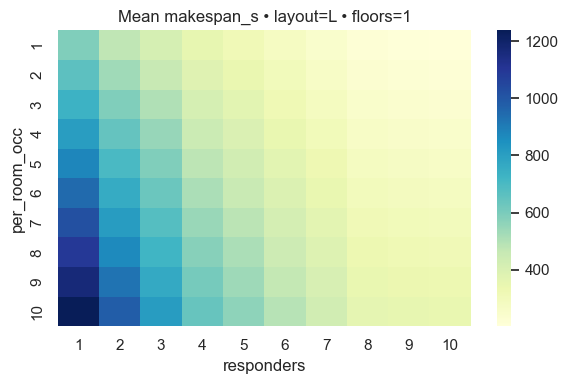

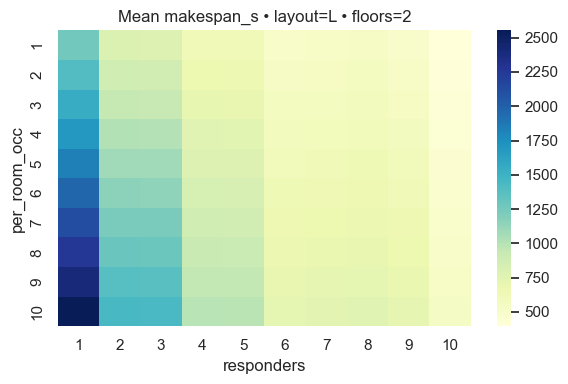

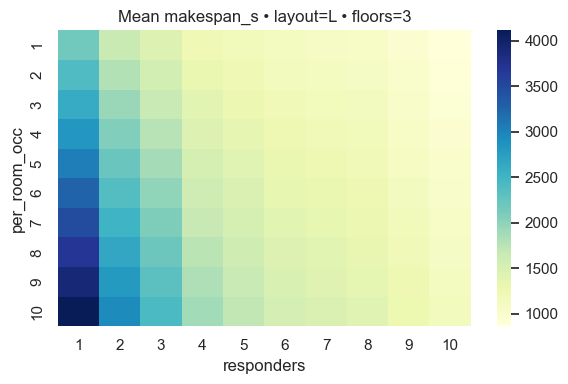

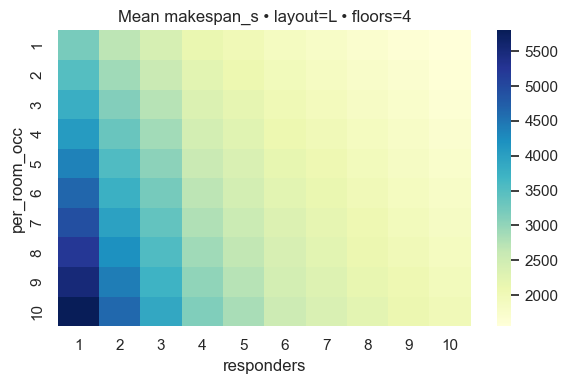

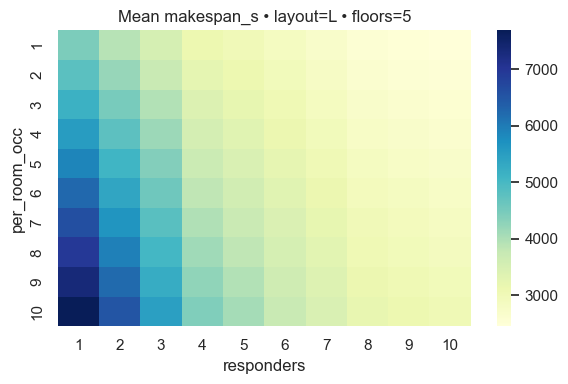

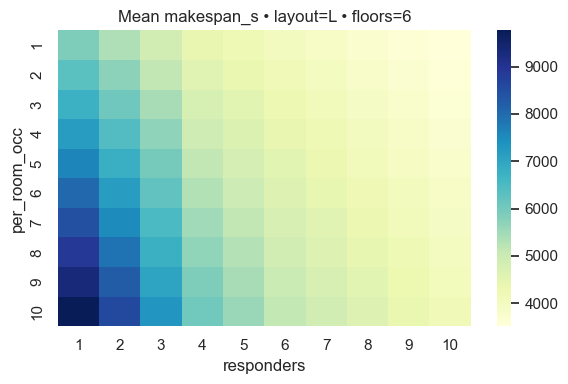

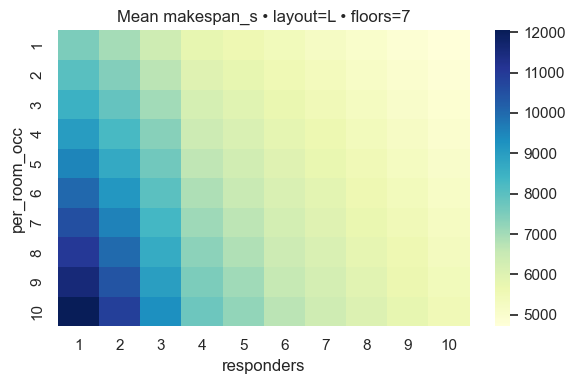

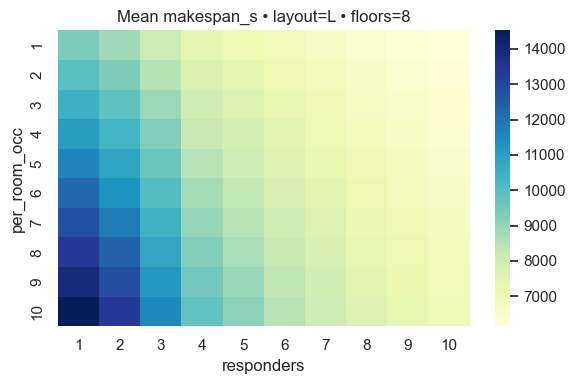

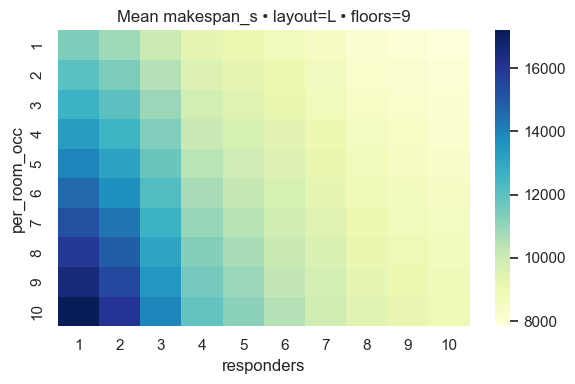

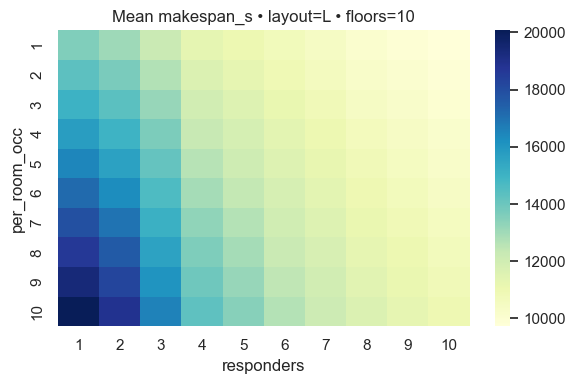

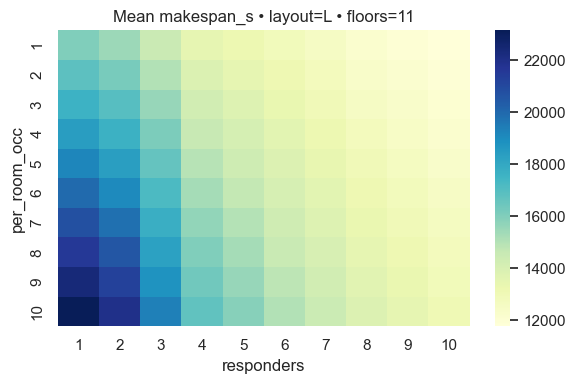

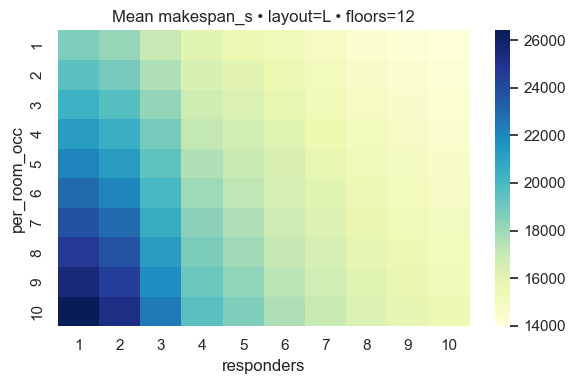

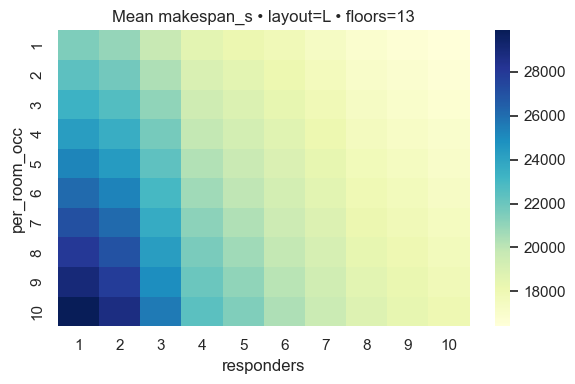

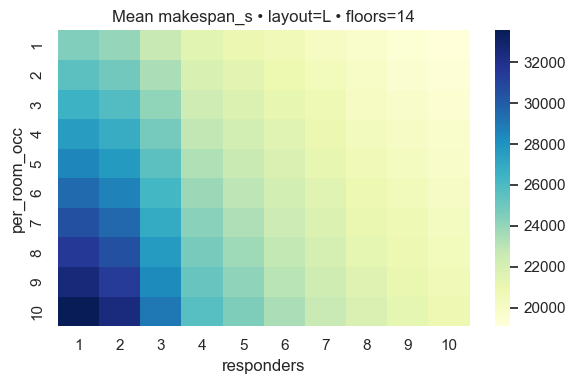

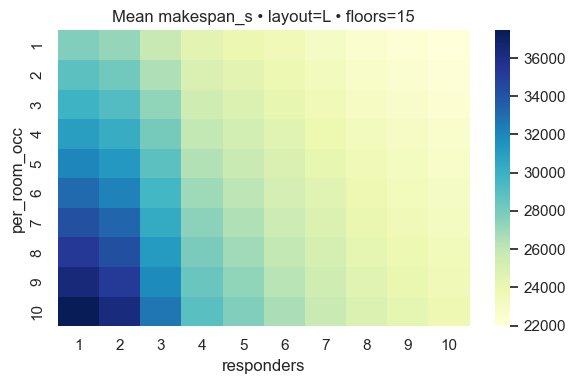

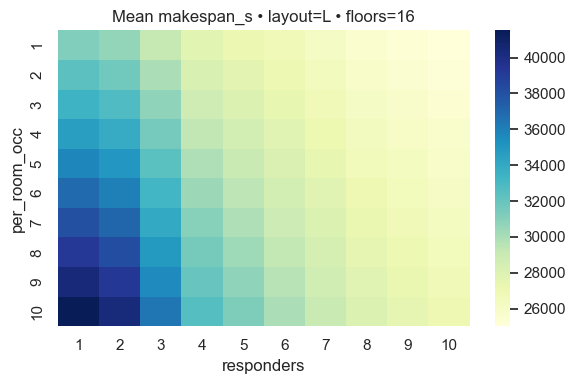

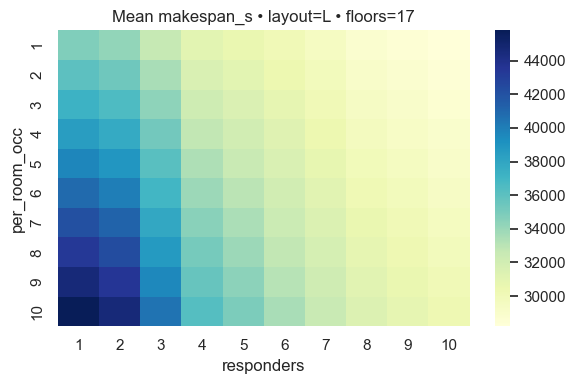

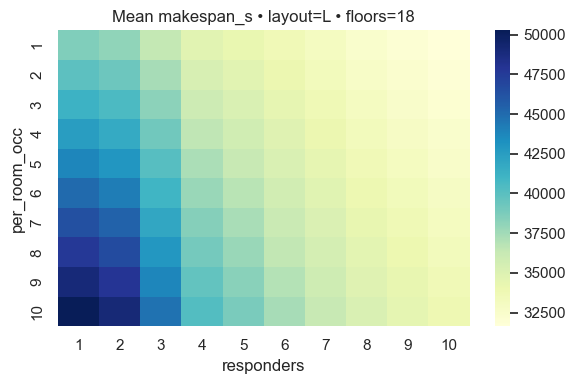

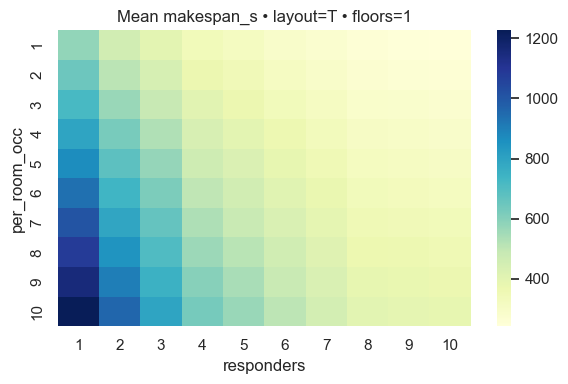

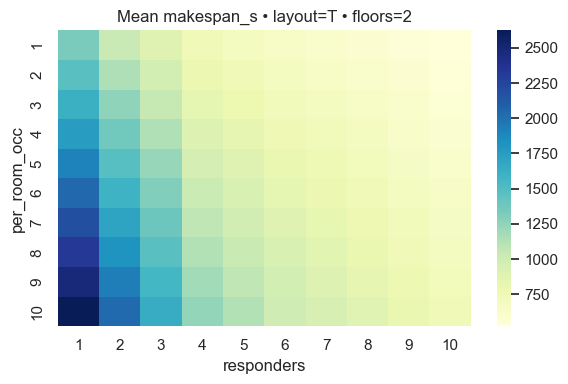

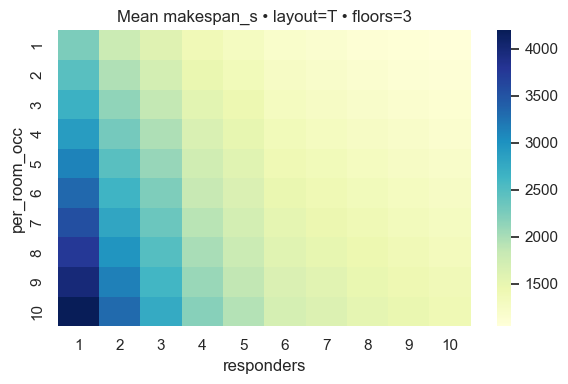

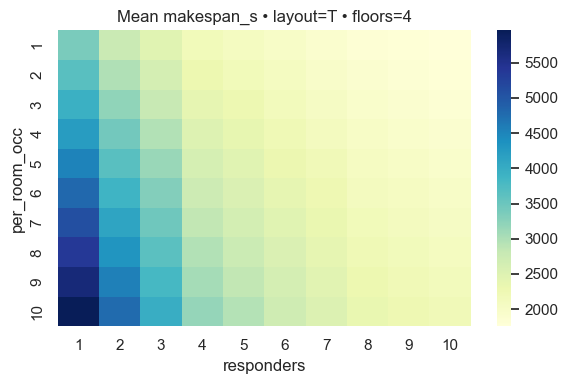

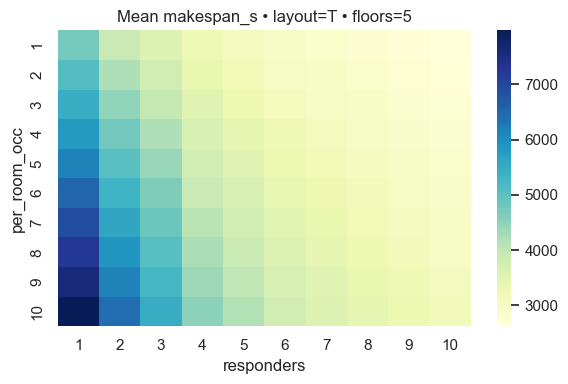

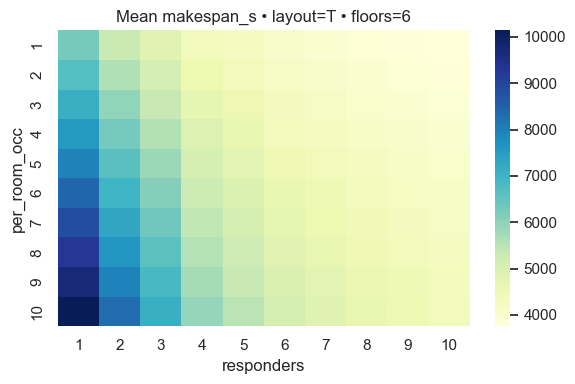

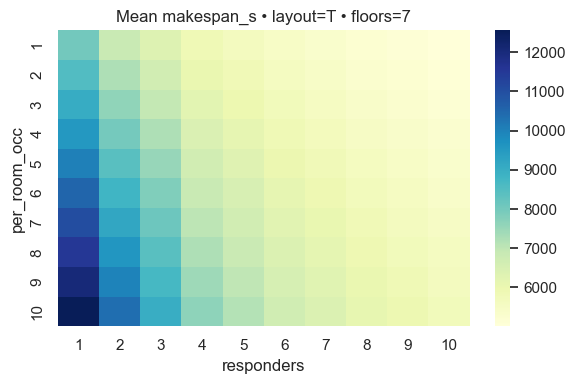

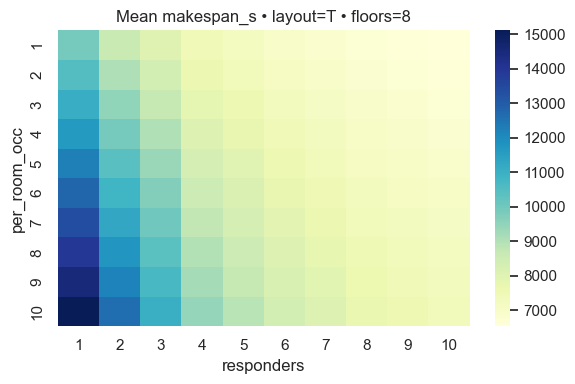

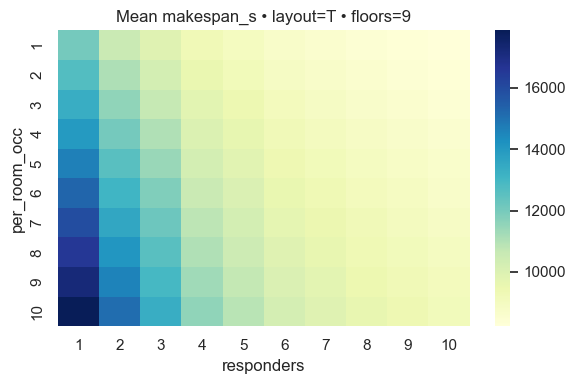

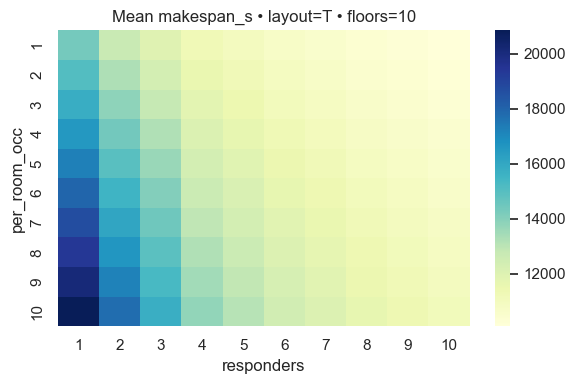

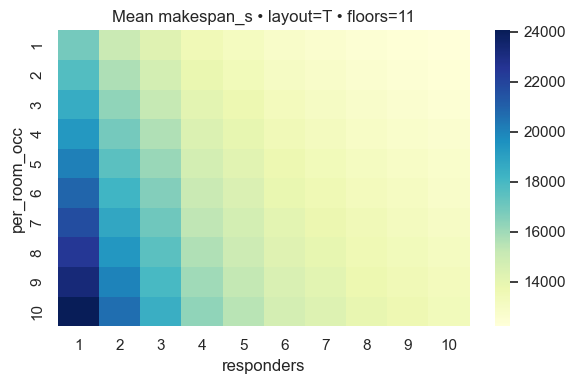

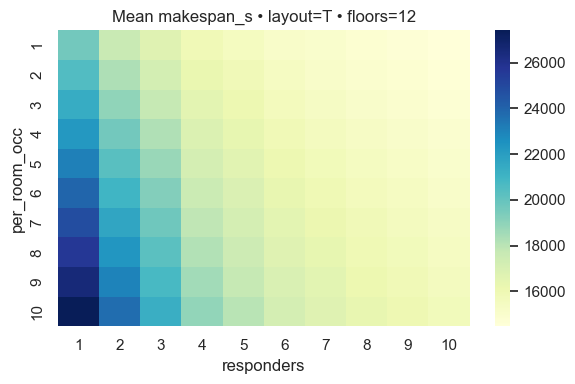

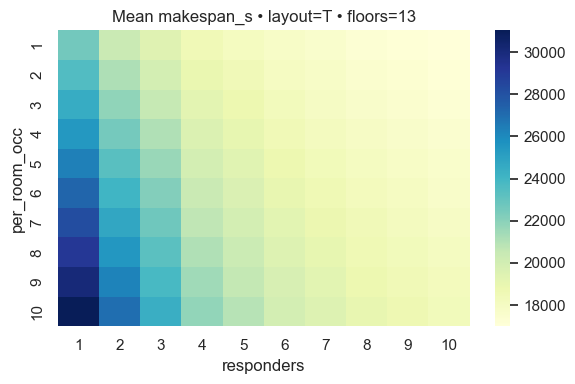

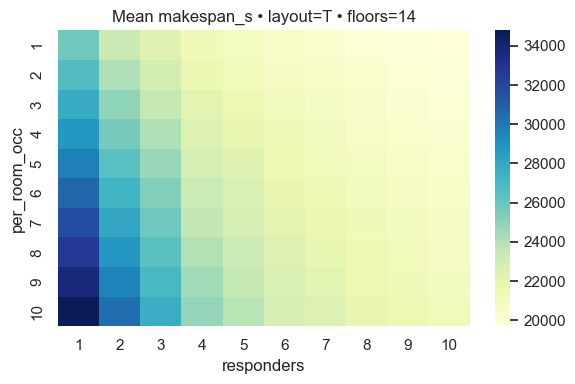

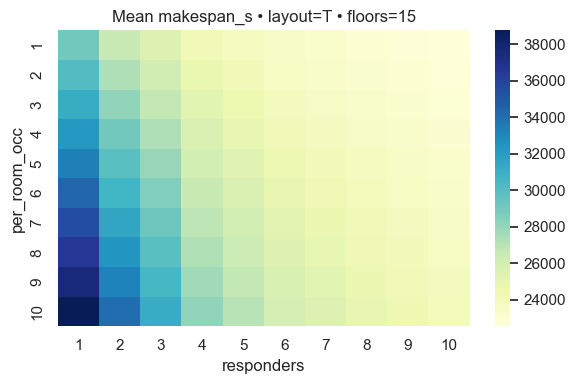

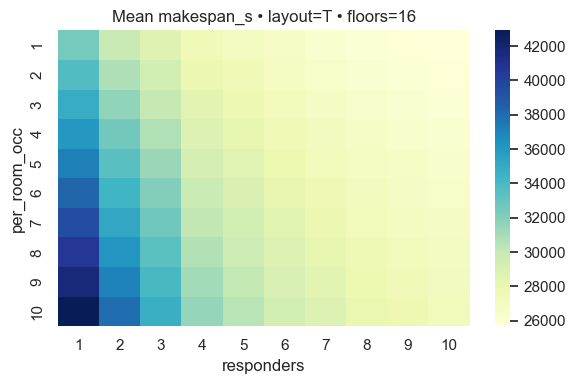

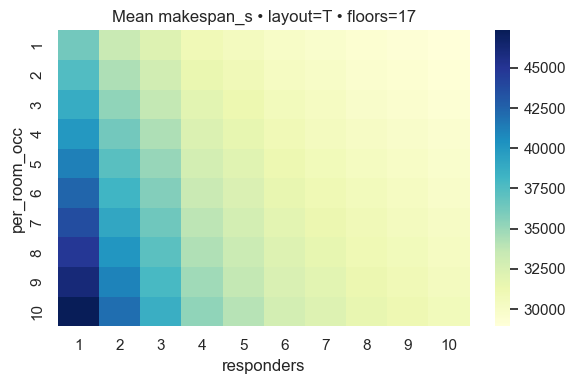

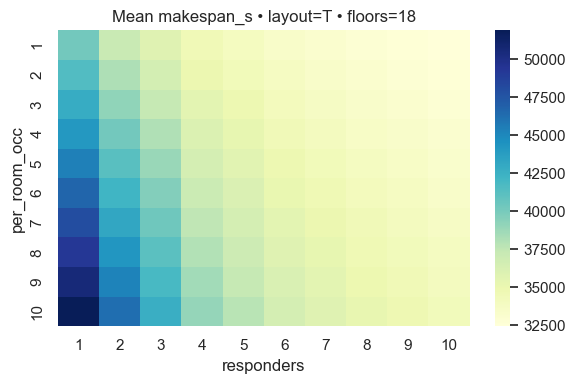

In [9]:
# 热力图：per_room_occ × responders 上的平均撤离时间（按楼层、布局分面）
import math

def draw_heatmap(sub, title):
    pivot = sub.pivot_table(index="per_room_occ", columns="responders", values="makespan_s", aggfunc="mean")
    if pivot.empty: 
        return
    sns.heatmap(pivot, cmap="YlGnBu")
    plt.title(title)
    plt.xlabel("responders")
    plt.ylabel("per_room_occ")

layouts = list(df["layout"].cat.categories) if str(df["layout"].dtype) == "category" else sorted(df["layout"].unique())
floors_list = sorted(df["floors"].unique())

for lay in layouts:
    for fl in floors_list:
        sub = df[(df["layout"] == lay) & (df["floors"] == fl)]
        if sub.empty:
            continue
        plt.figure(figsize=(6, 4))
        draw_heatmap(sub, f"Mean makespan_s • layout={lay} • floors={fl}")
        plt.tight_layout()
        plt.show()

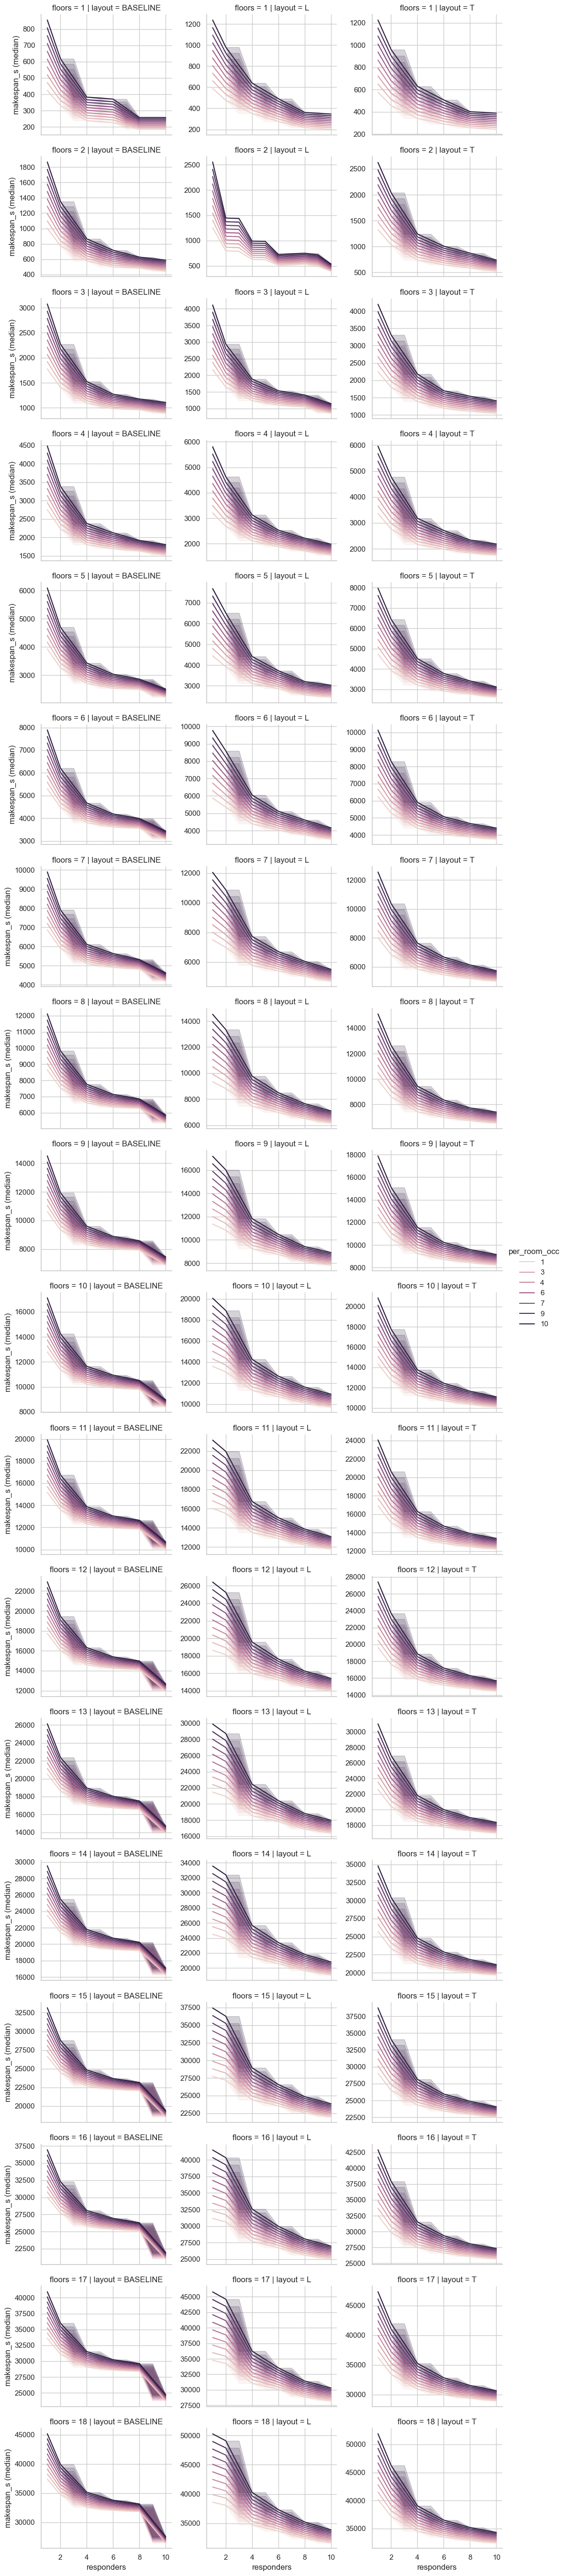

In [10]:
# 关系曲线：responders 对 makespan 的影响（按 per_room_occ 着色，楼层×布局分面）
# 使用中位数与误差带，便于稳健比较
g = sns.relplot(
    data=df,
    x="responders",
    y="makespan_s",
    hue="per_room_occ",
    kind="line",
    estimator="median",
    errorbar=("pi", 50),  # 中位数±四分位范围
    col="layout",
    row="floors",
    facet_kws=dict(sharey=False),
    height=3,
    aspect=1.2,
)
g.set_axis_labels("responders", "makespan_s (median)")
plt.show()

/var/folders/hc/md1w_nys60720kj9w3xngm5c0000gn/T/ipykernel_3105/3807590689.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["floors", "layout", "per_room_occ"], group_keys=True)
/var/folders/hc/md1w_nys60720kj9w3xngm5c0000gn/T/ipykernel_3105/3807590689.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calc_marginal)
/var/folders/hc/md1w_nys60720kj9w3xngm5c0000gn/T/ipykernel_3105/3807590689.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior

median_improve
responders                
1                      NaN
2              1172.619077
3              1079.022477
4              1079.022477
5               339.572086
6               339.572086
7               193.243859
8               193.243859
9               243.396631
10              243.396631

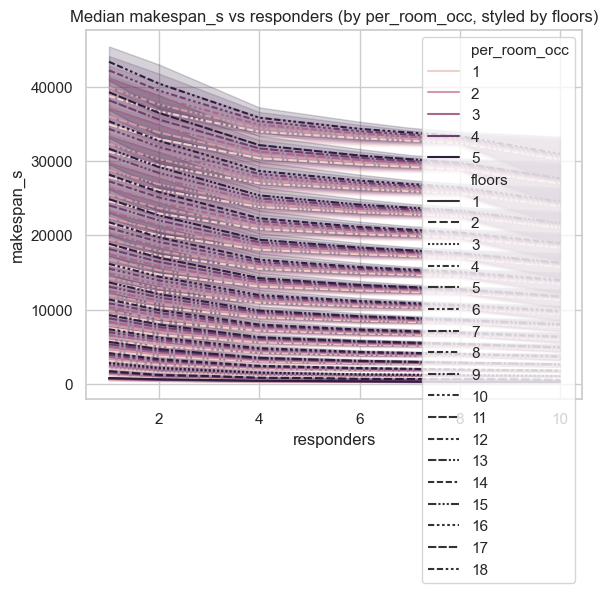

In [ ]:
# 边际收益：每增加1名responders带来的中位撤离时间改善
def calc_marginal(g):
    g = g.groupby("responders", as_index=False)["makespan_s"].median().sort_values("responders")
    g["delta_prev"] = g["makespan_s"].shift(1) - g["makespan_s"]  # 正值=改善
    return g

mg = (
    df.groupby(["floors", "layout", "per_room_occ"], group_keys=True)
      .apply(calc_marginal)
      .reset_index()
)

# 总览：不同 responders 档位的中位改善
summary_mg = (
    mg.groupby("responders")["delta_prev"]
      .median()
      .rename("median_improve")
      .to_frame()
)
display(summary_mg.head(10))

# 可视化：选取若干 per_room_occ 的曲线
sample_occ = sorted(df["per_room_occ"].unique())[:5]
sub_mg = mg[mg["per_room_occ"].isin(sample_occ)]
sns.lineplot(data=sub_mg, x="responders", y="makespan_s", hue="per_room_occ", style="floors")
plt.title("Median makespan_s vs responders (by per_room_occ, styled by floors)")
plt.show()

sns.lineplot(data=sub_mg, x="responders", y="delta_prev", hue="per_room_occ", style="floors")
plt.axhline(0, color="k", lw=1)
plt.title("Marginal improvement per +1 responder (median Δ makespan_s)")
plt.ylabel("Δ makespan_s (prev - current, >0 is better)")
plt.show()

/var/folders/hc/md1w_nys60720kj9w3xngm5c0000gn/T/ipykernel_3105/2371429500.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["floors", "layout", "per_room_occ", "responders"], as_index=False)
/var/folders/hc/md1w_nys60720kj9w3xngm5c0000gn/T/ipykernel_3105/2371429500.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg.groupby(["floors", "layout", "per_room_occ"], group_keys=True)
/var/folders/hc/md1w_nys60720kj9w3xngm5c0000gn/T/ipykernel_3105/2371429500.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of 

floors    layout  per_room_occ  responders     best_ms
0        1  BASELINE             1           1  423.609835
1        1  BASELINE             1           2  330.224927
2        1  BASELINE             1           3  238.431717
3        1  BASELINE             1           5  226.426460
4        1  BASELINE             1           7  185.431717
5        1  BASELINE             2           1  471.609835
6        1  BASELINE             2           2  362.224927
7        1  BASELINE             2           3  254.431717
8        1  BASELINE             2           5  242.426460
9        1  BASELINE             2           7  193.431717
10       1  BASELINE             3           1  519.609835
11       1  BASELINE             3           2  394.224927
12       1  BASELINE             3           3  270.431717
13       1  BASELINE             3           5  258.426460
14       1  BASELINE             3           7  201.431717
15       1  BASELINE             4           1  567.609835
16       1  BASELINE             4           2  426.224927
17       1  BASELINE             4           3  286.431717
18       1  BASELINE             4           5  274.426460
19       1  BASELINE             4           7  209.431717

/var/folders/hc/md1w_nys60720kj9w3xngm5c0000gn/T/ipykernel_3105/2371429500.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ex = pareto.groupby(["floors", "layout"]).head(1)[["floors", "layout"]].iloc[0]


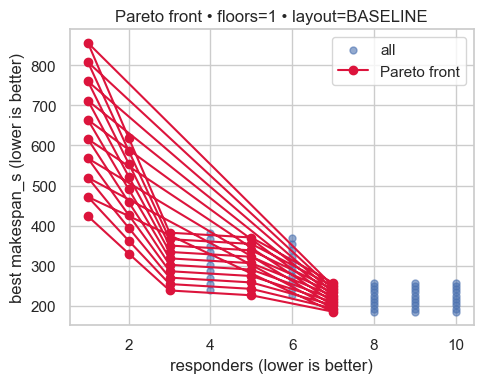

In [ ]:
# Pareto 前沿：在同时希望 responders 更少、makespan 更小的意义下的非支配解
agg = (
    df.groupby(["floors", "layout", "per_room_occ", "responders"], as_index=False)
      .agg(best_ms=("makespan_s", "min"))
)

def pareto_front(g):
    g = g.sort_values("responders")  # 从少到多
    best = np.inf
    keep = []
    for _, r in g.iterrows():
        m = r["best_ms"]
        if m < best:
            keep.append(True)
            best = m
        else:
            keep.append(False)
    return g[keep]

pareto = (
    agg.groupby(["floors", "layout", "per_room_occ"], group_keys=True)
       .apply(pareto_front)
       .reset_index(drop=True)
       .sort_values(["floors", "layout", "per_room_occ", "responders"])
)

display(pareto.head(20))

# 示例绘图：选择一个组合查看前沿
ex = pareto.groupby(["floors", "layout"]).head(1)[["floors", "layout"]].iloc[0]
fl_ex, lay_ex = int(ex["floors"]), ex["layout"]
one = agg[(agg["floors"] == fl_ex) & (agg["layout"] == lay_ex)]

plt.figure(figsize=(5,4))
plt.scatter(one["responders"], one["best_ms"], s=25, alpha=0.6, label="all")
front = pareto[(pareto["floors"] == fl_ex) & (pareto["layout"] == lay_ex)]
plt.plot(front["responders"], front["best_ms"], "-o", color="crimson", label="Pareto front")
plt.title(f"Pareto front • floors={fl_ex} • layout={lay_ex}")
plt.xlabel("responders (lower is better)")
plt.ylabel("best makespan_s (lower is better)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 导出若干结果，便于报告或复现
out_best = (
    df.sort_values("makespan_s")
      .drop_duplicates(["floors", "layout", "per_room_occ", "responders", "exit_combo_id"])
      .head(1000)
)
out_best.to_csv("../output/summary_top_cases.csv", index=False)

grp.to_csv("../output/summary_grouped.csv", index=False)
pareto.to_csv("../output/summary_pareto.csv", index=False)

print("导出完成：summary_top_cases.csv, summary_grouped.csv, summary_pareto.csv")

导出完成：summary_top_cases.csv, summary_grouped.csv, summary_pareto.csv
